In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#.............................................combining 4 types dementia files....................................

In [3]:
import pandas as pd

# Replace 'data/your_file.csv' with the actual path to your CSV file in Google Drive
csv_file_path1 = '/content/drive/MyDrive/dementia_data/cookie.csv'

# Try reading the CSV file with different encodings
try:
    df1 = pd.read_csv(csv_file_path1, encoding='utf-8')
except UnicodeDecodeError:
    try:
        df1 = pd.read_csv(csv_file_path1, encoding='latin-1')
    except UnicodeDecodeError:
        df1 = pd.read_csv(csv_file_path1, encoding='utf-16')




# Replace 'data/your_file.csv' with the actual path to your CSV file in Google Drive
csv_file_path2 = '/content/drive/MyDrive/dementia_data/fluency.csv'

# Try reading the CSV file with different encodings
try:
    df2 = pd.read_csv(csv_file_path2, encoding='utf-8')
except UnicodeDecodeError:
    try:
        df2 = pd.read_csv(csv_file_path2, encoding='latin-1')
    except UnicodeDecodeError:
        df2 = pd.read_csv(csv_file_path2, encoding='utf-16')




# Replace 'data/your_file.csv' with the actual path to your CSV file in Google Drive
csv_file_path3 = '/content/drive/MyDrive/dementia_data/recall.csv'

# Try reading the CSV file with different encodings
try:
    df3 = pd.read_csv(csv_file_path3, encoding='utf-8')
except UnicodeDecodeError:
    try:
        df3 = pd.read_csv(csv_file_path3, encoding='latin-1')
    except UnicodeDecodeError:
        df3 = pd.read_csv(csv_file_path3, encoding='utf-16')




# Replace 'data/your_file.csv' with the actual path to your CSV file in Google Drive
csv_file_path4 = '/content/drive/MyDrive/dementia_data/sentence.csv'

# Try reading the CSV file with different encodings
try:
    df4 = pd.read_csv(csv_file_path4, encoding='utf-8')
except UnicodeDecodeError:
    try:
        df4 = pd.read_csv(csv_file_path4, encoding='latin-1')
    except UnicodeDecodeError:
        df4 = pd.read_csv(csv_file_path4, encoding='utf-16')

In [4]:
# Get the number of rows
# Display the results together
display(df1.shape[0])
display(df2.shape[0])
display(df3.shape[0])
display(df4.shape[0])

3958

7485

4795

2997

In [5]:
# Display the results together
display(df1.shape[0])
display(df2.shape[0])
display(df3.shape[0])
display(df4.shape[0])

3958

7485

4795

2997

In [6]:
# Combine features and labels DataFrames
combined_data = pd.concat([df1, df2, df3, df4])

# Shuffle the rows of the combined DataFrame
combined_data = combined_data.sample(frac=1, random_state=42)

In [7]:
combined_data.shape[0]

19235

In [8]:
combined_data.head()

,sentence
736,and the mothers washing drying dishes
4716,rice
2013,and we get it with the uh
1957,i dont think i i lost that
7117,and the sail


In [9]:
# Count the number of blank rows
combined_data.isnull().all(axis=1).sum()

0

In [10]:
#  a dictionary to map current column names to new column names
column_name_mapping = {
    'sentence': 'Sentence'
}

# Renaming the columns using the dictionary
combined_data = combined_data.rename(columns=column_name_mapping)

In [11]:
print(combined_data.columns)

Index(['Sentence'], dtype='object')


In [12]:
# Group rows by chunks of 3 and concatenate the values
combined_data = combined_data.groupby(combined_data.index // 3).agg({'Sentence': ' '.join})


combined_data.reset_index(drop=True, inplace=True)

In [13]:
combined_data.tail()

,Sentence
2490,alright im also not okay
2491,soup screen howabout sidewalkq
2492,um am i allowed to say scotchq laughs scissors...
2493,um sighs because thats one came mind i know th...
2494,my mind is blank right now uh lets see i keep ...


In [14]:
combined_data.shape[0]

2495

In [15]:
import re

# Define a function to count hesitations and find repeated words
def count_hesitations_and_repeated_words(text):
    # Count hesitations (e.g., "uh", "um")
    hesitation_count = len(re.findall(r'\b(uh|um|uh-huh|um-hum|mhm|huh)\b', text, flags=re.IGNORECASE))

    # Finding repeated words
    words = text.lower().split()
    repeated_words = [word for word in set(words) if words.count(word) > 1]

    return hesitation_count, len(repeated_words)

# Create new columns for hesitation count and repeated word count
combined_data['hesitation_count'], combined_data['repeated_word_count'] = zip(*combined_data['Sentence'].apply(count_hesitations_and_repeated_words))

In [16]:
combined_data.head()

,Sentence,hesitation_count,repeated_word_count
0,hm hm i cant get very much on it mhm well the ...,3,6
1,it was about a grandfather with a child oh dis...,5,9
2,um um and the and the stool it hasnt tur uh t ...,6,9
3,evidently they hafta dry them now their um dis...,9,9
4,mhm no cant think of any more laughs your open...,7,6


In [17]:
# Remove rows where hesitation words are less than 3 and repeated words are less than 3
filtered_df1 = combined_data[(combined_data['hesitation_count'] >= 3) & (combined_data['repeated_word_count'] >= 3)]

In [18]:
filtered_df1.head()

,Sentence,hesitation_count,repeated_word_count
0,hm hm i cant get very much on it mhm well the ...,3,6
1,it was about a grandfather with a child oh dis...,5,9
2,um um and the and the stool it hasnt tur uh t ...,6,9
3,evidently they hafta dry them now their um dis...,9,9
4,mhm no cant think of any more laughs your open...,7,6


In [19]:
filtered_df1.shape[0]

586

In [20]:
# Add a new column and set all values to '1'
filtered_df1['Label'] = 1

<ipython-input-20-d942f809d52b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df1['Label'] = 1


In [21]:
filtered_df1.head()

,Sentence,hesitation_count,repeated_word_count,Label
0,hm hm i cant get very much on it mhm well the ...,3,6,1
1,it was about a grandfather with a child oh dis...,5,9,1
2,um um and the and the stool it hasnt tur uh t ...,6,9,1
3,evidently they hafta dry them now their um dis...,9,9,1
4,mhm no cant think of any more laughs your open...,7,6,1


In [22]:
# Save the updated DataFrame to a CSV file if needed
filtered_df1.to_csv("/content/drive/MyDrive/dementia_data/5_dementia_new.csv", index=False)

In [ ]:
#-----------------------healthy control data-----------------------------------------------

In [23]:


csv_file_path = '/content/drive/MyDrive/dementia_data/cookie_control.csv'

# Try reading the CSV file with different encodings
try:
    df = pd.read_csv(csv_file_path, encoding='utf-8')
except UnicodeDecodeError:
    try:
        df = pd.read_csv(csv_file_path, encoding='latin-1')
    except UnicodeDecodeError:
        df = pd.read_csv(csv_file_path, encoding='utf-16')

In [24]:
# Define a dictionary to map current column names to new column names
column_name_mapping = {
    'cookie': 'Sentence'
}

# Rename the columns using the dictionary
df = df.rename(columns=column_name_mapping)

In [26]:
print(df.columns)

Index(['Sentence'], dtype='object')


In [27]:
df.shape[0]

3207

In [28]:
# Count the number of blank rows
df.isnull().all(axis=1).sum()

1

In [29]:
df.dropna()

,Sentence
0,okay
1,uh the little boy is falling off the stool
2,he is giving cookies to the little girl
3,the little girl is telling him to be quiet so ...
4,mother is drying the dishes while the sink is ...
...,...
3202,uh this boy is about to fall off of the stool
3203,the mother is uh washing dishes and the waters...
3204,the wind is blowing the curtains
3205,the little girl is laughing at her brother who...


In [32]:
# Convert the 'Sentence' column to strings
df['Sentence'] = df['Sentence'].astype(str)

# Group rows by chunks of 3 (assuming you want 3 rows per group) and concatenate the 'Sentence' values
df = df.groupby(df.index // 3).agg({'Sentence': ' '.join})

# Reset index to make the new DataFrame more readable
df.reset_index(drop=True, inplace=True)

In [33]:
df.tail()

,Sentence
1064,everything thats happening okay it looks like ...
1065,and the ladys drying the dishes and uh everyth...
1066,better get out of there laughs the girl seems ...
1067,and uh thats about all i can see uh this boy i...
1068,the wind is blowing the curtains the little gi...


In [34]:
df.shape[0]

1069

In [35]:
# Create new columns for hesitation count and repeated word count
df['hesitation_count'], df['repeated_word_count'] = zip(*df['Sentence'].apply(count_hesitations_and_repeated_words))

In [36]:
df.head()

,Sentence,hesitation_count,repeated_word_count
0,okay uh the little boy is falling off the stoo...,1,3
1,the little girl is telling him to be quiet so ...,0,3
2,um well the sink is overflowing mother is stan...,1,5
3,um there uh the the the boy is trying to get a...,2,5
4,to be quiet dont let mother know what youre do...,0,1


In [37]:
# Remove rows where hesitation words are greater than 3 and repeated words are greater than 5
filtered_df2 = combined_data[(combined_data['hesitation_count'] < 3) & (combined_data['repeated_word_count'] < 3)]

In [38]:
filtered_df2.head(20)

,Sentence,hesitation_count,repeated_word_count
11,can i look at it and tell you um book uh take ...,2,0
42,sweet what do you want here openq drawerq beca...,0,2
44,the mother is wa drying dishes the child was t...,0,2
75,thats about it sixq were having a cold winter ...,0,2
129,alright oh four hmhm that was too much there f...,1,2
170,the tree was out in the on the lawn and the wo...,2,2
214,horse kangaroo uh open the bureau drawer the t...,1,2
472,ermine w woman is drying dishes okay fast okay...,0,2
618,okay yeah okay fairy okay fussy childq hospita...,0,2
655,french fiddle little boys stealing cookies out...,2,2


In [39]:
filtered_df2.shape[0]

955

In [ ]:
# Add a new column and set all values to '1'
filtered_df2['Label'] = 0

<ipython-input-49-e912c2d5c2ae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df2['Label'] = 0


In [ ]:
filtered_df2.head()

,Sentence,hesitation_count,repeated_word_count,Label
11,can i look at it and tell you um book uh take ...,2,0,0
42,sweet what do you want here openq drawerq beca...,0,2,0
44,the mother is wa drying dishes the child was t...,0,2,0
75,thats about it sixq were having a cold winter ...,0,2,0
129,alright oh four hmhm that was too much there f...,1,2,0


In [ ]:
# Save the updated DataFrame to a CSV file if needed
filtered_df2.to_csv("/content/drive/MyDrive/dementia_data/5_control_new.csv", index=False)

In [ ]:
# Combine features and labels DataFrames
combined = pd.concat([filtered_df1, filtered_df2])

# Shuffle the rows of the combined DataFrame
combined = combined.sample(frac=1, random_state=42)

In [ ]:
combined.shape[0]

1541

In [ ]:
combined.head()

,Sentence,hesitation_count,repeated_word_count,Label
2442,dogs horses um,1,0,0
2090,yeah yeah bread,0,1,0
2191,uh flower fish xxx four did i say findq,1,0,0
1529,well most anything anything to eat okay uh mel...,4,4,1
2018,uh hm food fire uh fence,2,1,0


In [ ]:
combined.tail()

,Sentence,hesitation_count,repeated_word_count,Label
2061,uh coffee cake is there a limit to how many i ...,1,2,0
2234,uh egads pig uh did i saw cowq,2,1,0
1754,um furniture um food did i say frostq,2,1,0
2410,sink s salt sassafras,0,0,0
2053,uh fl fast faintk farmerk,1,0,0


In [ ]:
# Replace ['column1', 'column2', 'column3'] with the actual names of the columns you want to remove
columns_to_remove_combined = ['hesitation_count', 'repeated_word_count']

# Strip whitespace from column names
columns_to_remove_combined = [col.strip() for col in columns_to_remove_combined]

combined = combined.drop(columns=columns_to_remove_combined)

In [ ]:
combined.head()

,Sentence,Label
2442,dogs horses um,0
2090,yeah yeah bread,0
2191,uh flower fish xxx four did i say findq,0
1529,well most anything anything to eat okay uh mel...,1
2018,uh hm food fire uh fence,0


In [ ]:
# Save the updated DataFrame to a CSV file i
combined.to_csv("/content/drive/MyDrive/dementia_data/5_combined_new.csv", index=False)

In [ ]:
# Count the occurrences of each class in the 'Label' column
class_counts = combined['Label'].value_counts()


print(class_counts)

0    955
1    586
Name: Label, dtype: int64


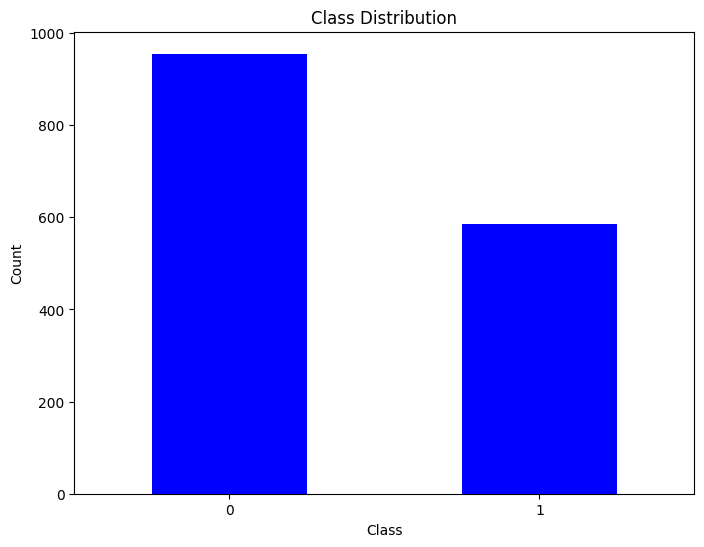

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt




class_counts = combined['Label'].value_counts()


plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='blue')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(rotation=0)
plt.show()
